# problem 4

In [113]:
#### CREDITS: Wencen Wu ####
import numpy as np
from numpy.linalg import inv
#parameters
rad = 10
thk = 5
sep = 5
N = 1000
#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    #label
    point = []
    label = []
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                point.append([X1 + x,Y1 + y])
                label.append(1)
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                point.append([X2 + x,Y2 + y])
                label.append(-1)
                cnt += 1
        else:
            continue

    return top,bottom,label,point

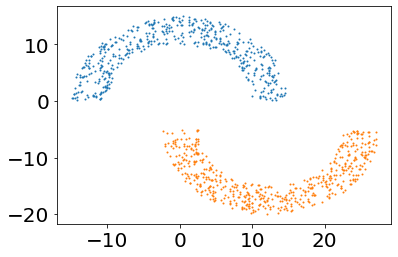

In [114]:
import matplotlib.pyplot as plt
top,bottom,label,point = generatedata(rad,thk,sep,N)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [115]:
def Check(X, y, w):
    #check if there are still misclassfied point in the X
    n = X.shape[0]
    num = np.sum(X.dot(w) * y > 0)
    return num == n

def PLA(X, y, eta=1, max_step=np.inf):
    n, d = X.shape
    w = np.zeros(d)
    step_count = 0
    i = 0
    last = 0
    while not(Check(X, y, w)) and step_count < max_step:
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            step_count += 1
            w += eta * y[i] * X[i, :]
            last = i
        i += 1
        if i == n:
            i = 0
#       return step_count, last, w 
    return w


### (a)

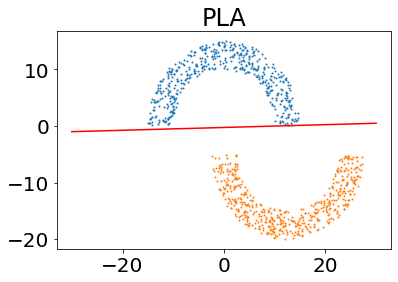

In [116]:
# plus x0 to each point
point_bias = np.c_[np.ones(N), point]
#PLA
w = PLA(point_bias, label)
r = 2 * (rad + thk)
a1 = np.array([-r,r]) 
b1 = - (w[0] + w[1] * a1) / w[2]

plt.plot(a1, b1, c="red")
plt.title('PLA')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

### (b)

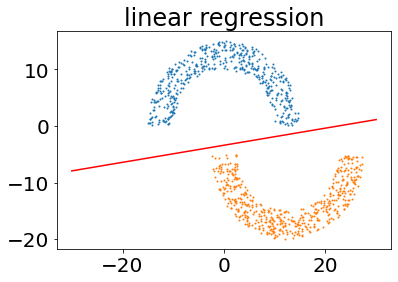

In [117]:
#(b)linear regression
w1 = inv(point_bias.T.dot(point_bias)).dot(point_bias.T).dot(label)

a2 = np.array([-r,r])
b2 = - (w1[0] + w1[1] * a1) / w1[2]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(a2, b2, c="red")
plt.title('linear regression')
plt.show()

Observation: the line ploted by thoes two method are different, but all of them can be used for classification, also from the linear regression, it looks like that the line seems like separate the data better(because the line seperate two part more evenly)

# problem 5


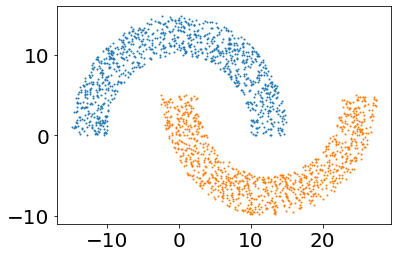

In [118]:
import matplotlib.pyplot as plt
rad = 10
thk = 5
sep = -5
N = 2000
top,bottom,label,point = generatedata(rad,thk,sep,N)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

### (a) 
    if I run PLA algorithm this time, because the data is not linear separable,  and the default for PLA is running untill it find a line that make the data linear separable, therefore the PLA will keep running and will not stop

### (b)

In [119]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
def error_count(X, y, w):

    num = np.sum(X.dot(w) * y <= 0)
    return np.sum(num)

In [120]:
def Pocket_PLA(X, y, eta=1, max_step=np.inf):
    n, d = X.shape
    w = np.zeros(d)
    w0 = np.zeros(d)
    t = 0
    error = error_count(X, y, w0)
    i = 0
    W = []
    
    W_hat = []
    while (error != 0 and t < max_step):
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            w += eta * y[i] * X[i, :]
            t += 1
            error_now = error_count(X, y, w)
            if error_now < error:
                error = error_now
                w0 = np.copy(w)

            W_hat.append(np.copy(w0))
            W.append(np.copy(w))
        i += 1
        if i == n:
            i = 0
    return np.array(W), np.array(W_hat), w0, error
#     return w0,error

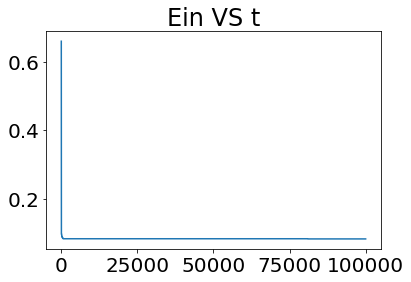

In [121]:
point_bias = np.c_[np.ones(N), point]

max_iteration = 100000

W, W_hat,w0,error = Pocket_PLA(point_bias,label,max_step = max_iteration)

ein = np.mean(np.sign(W_hat.dot(point_bias.T)) != label, axis=1)
t= np.arange(max_iteration)
plt.plot(t,ein)
plt.title('Ein VS t')
plt.show()

### (c)

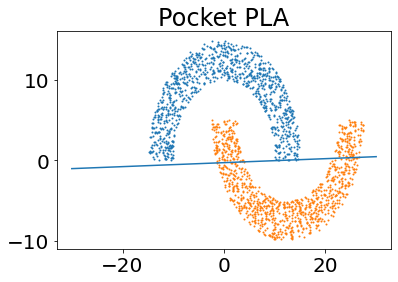

hypothesis
Pocket PLA error rate 0.0825


In [122]:
r = 2 * (rad + thk)
a1 = np.array([-r,r])
b1 = - (w[0] + w[1] * a1) / w[2]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(a1, b1)
plt.title('Pocket PLA')
plt.show()
print('hypothesis')
print('Pocket PLA error rate ' + str(error / N))

### (d)

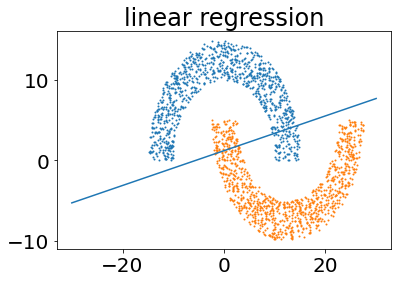

linear regression error rate 0.097


In [123]:
w_lr = inv(point_bias.T.dot(point_bias)).dot(point_bias.T).dot(label)
a2 = np.array([-r,r])
b2 = - (w_lr[0] + w_lr[1] * a1) / w_lr[2]
 
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(a2, b2)
plt.title('linear regression')
plt.show()
error = np.mean(np.sign(point_bias.dot(w_lr)) != label)
print('linear regression error rate ' + str(error))

 compare with pocket algorithm the linear algorithm is faster and it separate the result more evenly(I guess that means that linear algorithm has better quality)

### (e)

#### e.a

In [124]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(point)

def f(x1, x2, w):
    X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
 
    poly = PolynomialFeatures(3)
    X_poly = poly.fit_transform(X)
    result = X_poly.dot(w)
    print (result.shape)
  
    result = np.reshape(result, np.shape(x1))
    return result

n = 2000
a = np.linspace(-r, r, n)
b = np.linspace(-r, r, n)

A, B = np.meshgrid(a, b)

max_step = 100000

#Pocket_PLA
W_poly, W_poly_hat, w_poly, error_poly = Pocket_PLA(X_poly, label, max_step=max_step)
ein_poly = np.mean(np.sign(W_poly_hat.dot(X_poly.T)) != label, axis=1)


#### e.b

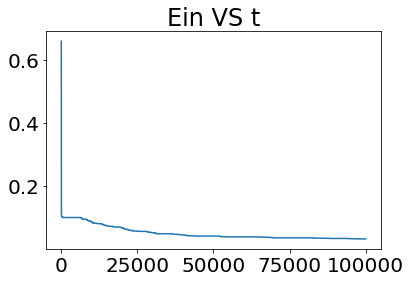

In [125]:
plt.plot(t, ein_poly)
plt.title('Ein VS t')
plt.show()

#### e.c

(4000000,)


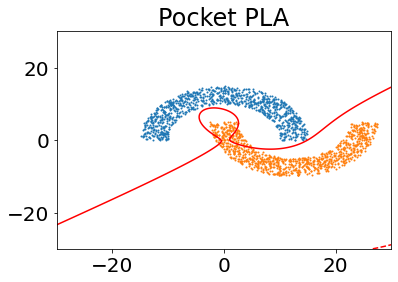

after transformation PLA the error rate is 0.0315


In [126]:
plt.contour(A, B, f(A, B, w_poly), 1, colors = 'red')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.title('Pocket PLA')
plt.show()
print('after transformation PLA the error rate is ' + str(error_poly / N))

#### e.d

(4000000,)


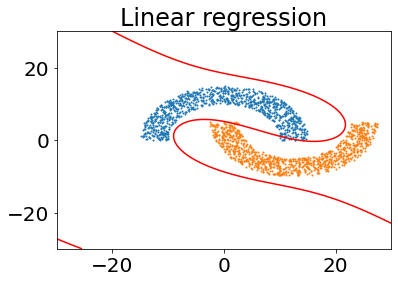

after transformation linear regression error rate0.007


In [127]:
w_poly_lr = inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(label)
plt.contour(A, B, f(A, B, w_poly_lr), 1, colors = 'red')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.title('Linear regression')
plt.show()
error = np.mean(np.sign(X_poly.dot(w_poly_lr)) != label)
print('after transformation linear regression error rate' + str(error))

from the graph of linear regression and PLA it is obviously that the linear regression has better quality than PLA and linear regression has low error rate

# problem 6


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0) 
%matplotlib inline

training_data1_df = pd.read_csv("ZipDigits_traning.csv") # laod data from ZipDigits.training
                                                         # to do this step I firstly converted the file to csv file
training_data2_df = pd.read_csv("ZipDigits_test.csv")

training_data1_df.shape
training_data1_df = training_data1_df.astype(float)

training_data2_df.shape
training_data2_df = training_data2_df.astype(float)

In [129]:
def prepare(dataset):
        filtered_training_data_1 = dataset['1'] == 1.0  #filter data 1
        filtered_training_data_5 = dataset['1'] == 5.0 #filter data 5

        training_data1_df_1 = dataset[filtered_training_data_1]
        training_data1_df_5 = dataset[filtered_training_data_5]
        
        
        frames = [training_data1_df_1,training_data1_df_5]
        filtered_df = pd.concat(frames)   #add two frames together
        return filtered_df

In [130]:
filtered = prepare(training_data1_df)
filtered.index = np.arange(1, len(filtered) + 1) # reconstruct filtered data with correct index

filtered2 = prepare(training_data2_df)
filtered2.index = np.arange(1, len(filtered2) + 1)

data_set2 = filtered2.drop(columns=['1'])
numpy_data = data_set2.to_numpy()

In [131]:
def error(data,label,length,function):
    error_count_for_test = 0
    for i in range(length):
        if(function(data[i,0]) > data[i,1] and label[i] == 1):
            error_count_for_test += 1
        elif(function(data[i,0]) < data[i,1] and label[i] == -1):
            error_count_for_test += 1
        else:
            error_count_for_test = error_count_for_test

    return error_count_for_test

In [132]:
def get_dataset(data):
        data_set2 = data.drop(columns=['1'])
        numpy_data = data_set2.to_numpy()
        chcker = data.to_numpy()
        length = len(numpy_data)
        x1 = np.zeros(length)
        negetive = np.zeros(length)
        positive = np.zeros(length)# for indensity  in the dataframe -1 is white and 1 is black
        x2 = np.zeros(length) # for symmetry
        x3 = np.zeros(length)
        const = 16

        for i in range(length):
            for j in range(256):
                if(numpy_data[i][j] <= 0):
                    negetive[i]+= numpy_data[i][j] #intensity
                else:
                    positive[i]+= numpy_data[i][j]
            x1[i] = 1-abs(negetive[i]/(abs(negetive[i])+positive[i]))
#                 x1[i] =1- abs(negetive[i]/256)
            
        for i in range(length):
            image_data = np.reshape(numpy_data[i],(16,16))
            for j in range(15):
                for x in range(7):
                    x2[i] += abs(image_data[j][x]-image_data[j][15-x])
                    
        for i in range(length):
            image_data = np.reshape(numpy_data[i],(16,16))
            for j in range(7):
                for x in range(15):
                    x3[i] += abs(image_data[j][x]-image_data[15-j][x])
                        
        for i in range(length):
            x2[i] = 1-((x2[i]+x3[i])/200)
        Data_vector = np.array(list(zip(x1,x2)))
        return Data_vector , chcker

In [133]:

def PLA_for_6(X, y, eta=1, max_step=1000):

    n, d = X.shape
    w = np.zeros(d)
    t = 0
    
    i = 0
    
    last = 0
    while not(Check(X, y, w)) and t < max_step:
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            t += 1
            w += eta * y[i] * X[i, :]
            last = i
        
        i += 1
        if i == n:
            i = 0
    error = error_count(X, y, w)
    return t, last, w, error

### (a)

1561


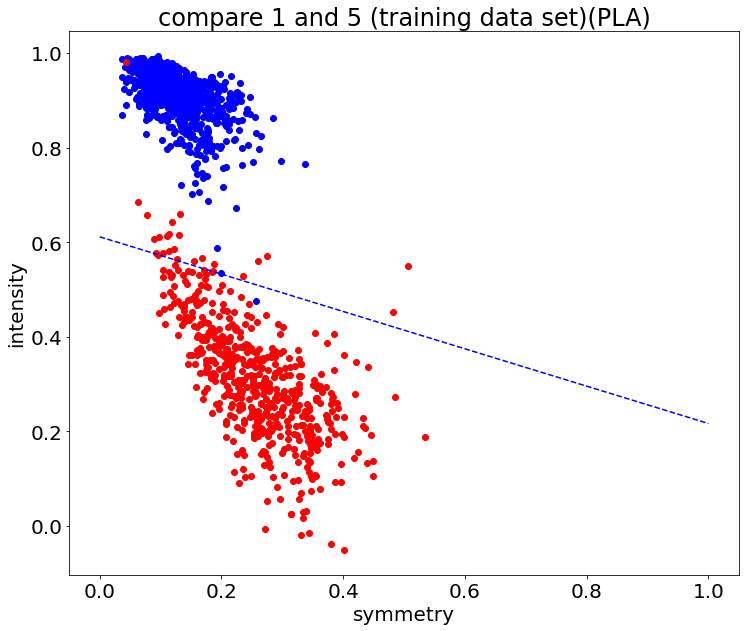

PLA error rate for traning data set is0.016655989750160152


In [135]:
data_training, list_training = get_dataset(filtered)
data_test, list_test = get_dataset(filtered2)

length_training = len(data_training)
print(length_training)
length_test = len(data_test) # get test data set

figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca(); #Get the current Axes instance on the current figure matching the given keyword args, or create one.

data_training_y = [] #array to label 1 or 5 1 is 1 and -1 is 5

data_training_x = np.linspace(0,1);


for i in range(length_training):
    if(list_training[i][0] == 1.0):
        data_training_y.append(1);
        plt.plot(data_training[i,0],data_training[i,1],'bo');
    else:
        data_training_y.append(-1);
        plt.plot(data_training[i,0],data_training[i,1],'ro');
        
data_training_treat = np.c_[np.ones(length_training), data_training]

t6_data_training, last6_data_training, w6_data_training, error6_data_training = PLA_for_6(data_training_treat, data_training_y) 

#slope and intercept
slope_training = -w6_data_training[1]/w6_data_training[2];
intercept_training = -w6_data_training[0]/w6_data_training[2];
function_data_training = lambda x: slope_training * x + intercept_training;



plt.plot(data_training_x,function_data_training(data_training_x),'b--',label='PLA.')
# plt.plot(a3, b3, c="red")
plt.title('compare 1 and 5 (training data set)(PLA)')
plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()
print('PLA error rate for traning data set is' + str(error6_data_training / length_training))

424


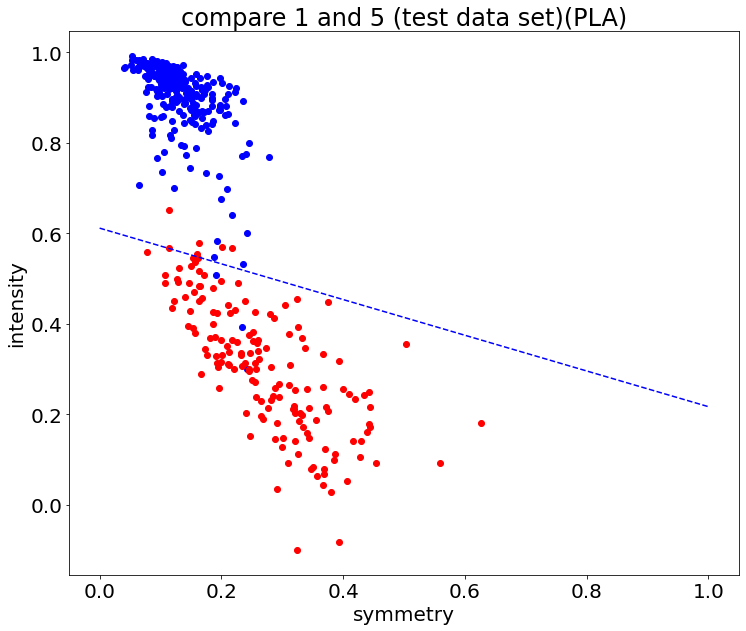

PLA error rate for test data set is 0.02122641509433962


In [136]:
#data_test, list_test = get_dataset(filtered2)
#length_test = len(data_test) # get test data set

figure =plt.figure(figsize=(12,10))
figure_gca = plt.gca();

data_test_y = [] #array to label 1 or 5 1 is 1 and -1 is 5
for i in range(length_test):
    if(list_test[i][0] == 1.0):
        data_test_y.append(1);
        plt.plot(data_test[i,0],data_test[i,1],'bo');
    else:
        data_test_y.append(-1);
        plt.plot(data_test[i,0],data_test[i,1],'ro');
        
error_PLA = error(data_test,data_test_y,length_test,function_data_training)
print(length_test)
plt.plot(data_training_x,function_data_training(data_training_x),'b--',label='PLA.')
# plt.plot(a3, b3, c="red")
plt.title('compare 1 and 5 (test data set)(PLA)')
plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()
print('PLA error rate for test data set is ' + str(error_PLA / length_test))


### (b)

In [137]:
def Pocket_PLA_6(X, y, eta=1, max_step=1000):


    n, d = X.shape

    w = np.zeros(d)

    w0 = np.zeros(d)

    t = 0

    error = error_count(X, y, w0)
    i = 0
    W = []
    
    W_hat = []
    while (error != 0 and t < max_step):
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            w += eta * y[i] * X[i, :]
            t += 1
            error_now = error_count(X, y, w)
            if error_now < error:
                error = error_now
                w0 = np.copy(w)

            W_hat.append(np.copy(w0))
            W.append(np.copy(w))
        i += 1
        if i == n:
            i = 0
    return np.array(W), np.array(W_hat), w0, error

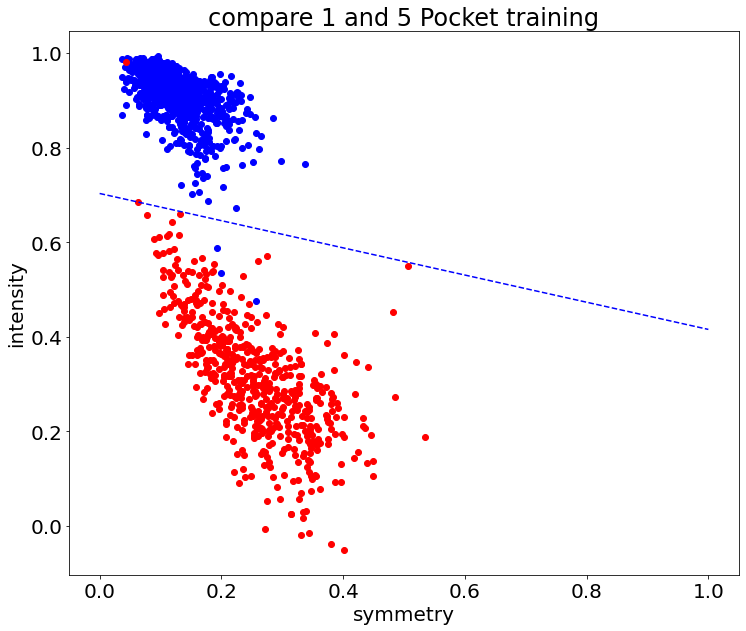

Pocket PLA error rate 0.0025624599615631004


In [138]:
# w_lr = inv(X_treat.T.dot(X_treat)).dot(X_treat.T).dot(label)
#data_training, list_training
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca();

for i in range(length_training):
    if(list_training[i][0] == 1.0):
        plt.plot(data_training[i,0],data_training[i,1],'bo');
    else:
        plt.plot(data_training[i,0],data_training[i,1],'ro');

W_PPLA_training, W_hat_PPLA_training,w0_PPLA_training,error_PPLA_training = Pocket_PLA_6(data_training_treat, data_training_y)

slope_PPLA_training = -w0_PPLA_training[1]/w0_PPLA_training[2];
intercept_PPLA_training = -w0_PPLA_training[0]/w0_PPLA_training[2];
pocket = lambda x: slope_PPLA_training * x + intercept_PPLA_training;


plt.plot(data_training_x,pocket(data_training_x),'b--',label='PLA.')
# plt.plot(a3, b3, c="red")
plt.title('compare 1 and 5 Pocket training')
plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()
print('Pocket PLA error rate ' + str(error_PPLA_training / length_training))

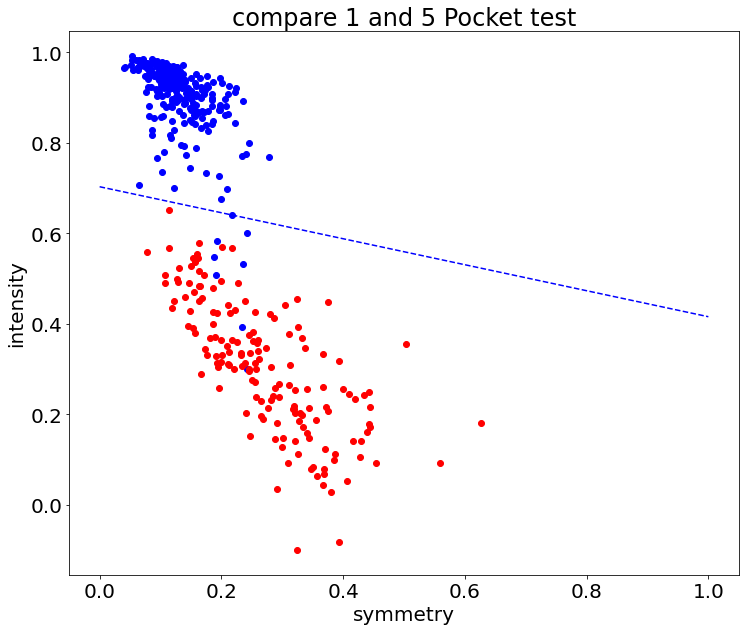

Pocket PLA error rate 0.01650943396226415


In [139]:
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca();

for i in range(length_test):
    if(list_test[i][0] == 1.0):
        plt.plot(data_test[i,0],data_test[i,1],'bo');
    else:
        plt.plot(data_test[i,0],data_test[i,1],'ro');

error_PPLA = error(data_test,data_test_y,length_test,pocket)

plt.plot(data_training_x,pocket(data_training_x),'b--',label='PLA.')
# plt.plot(a3, b3, c="red")
plt.title('compare 1 and 5 Pocket test')
plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()
print('Pocket PLA error rate ' + str(error_PPLA/ length_test))

### (c) 
    Compare 6a and 6b, because the pocket algorithm will take the best solution in hand therefore, the error rate of pocket
    algorithm is better than PLA

### (d) run 1000 times


In [145]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(data_training)

def f(x1, x2, w):
    X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
 
    poly = PolynomialFeatures(3)
    X_poly = poly.fit_transform(X)
    

    result = X_poly.dot(w)
  
    result = np.reshape(result, np.shape(x1))
    return result

n = len(data_training)
a = np.linspace(0, 1, n)
b = np.linspace(0, 1, n)

A, B = np.meshgrid(a, b)

max_step = 1000

#Pocket_PLA
W_poly, W_poly_hat, w_poly, error_poly = Pocket_PLA(X_poly, data_training_y, max_step=max_step)
ein_poly = np.mean(np.sign(W_poly_hat.dot(X_poly.T)) != data_training_y, axis=1)


### (e) plot

after transformation the error rate is 0.0025624599615631004


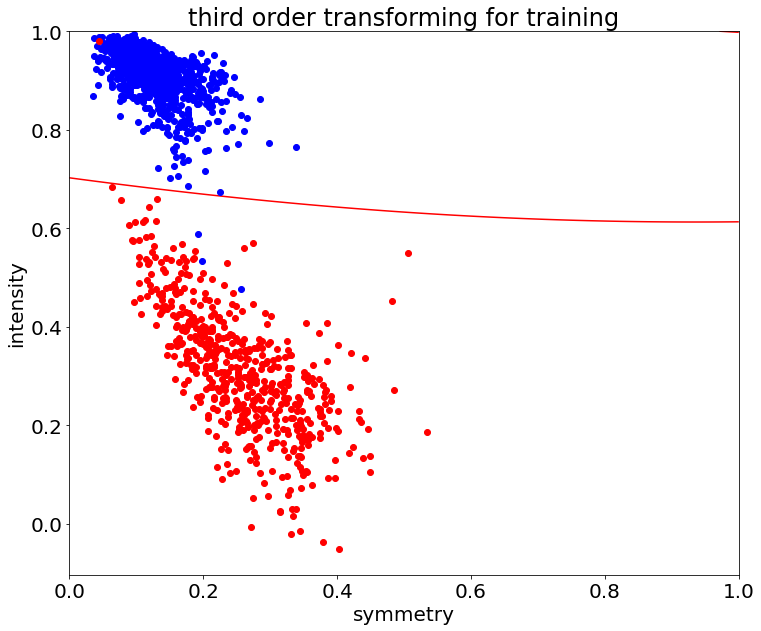

In [150]:


figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca();
for i in range(length_training):
    if(list_training[i][0] == 1.0):
        plt.plot(data_training[i,0],data_training[i,1],'bo');
    else:
        plt.plot(data_training[i,0],data_training[i,1],'ro');
        
plt.contour(A, B, f(A, B, w_poly), 1, colors = 'red')  
plt.title('third order transforming for training')

print('after transformation the error rate is ' + str(error_poly / n))

plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()

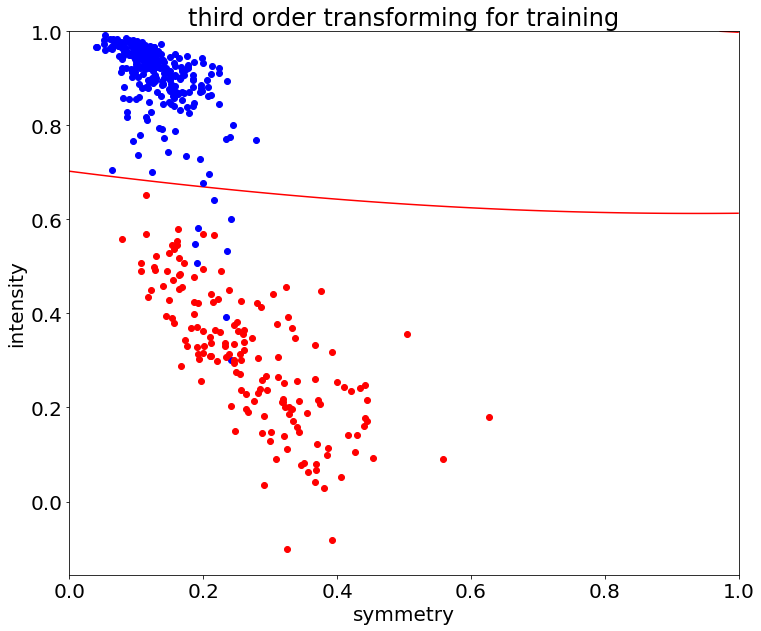

after transformation the error rate is 0.018867924528301886


In [151]:
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca();
for i in range(length_test):
    if(list_test[i][0] == 1.0):
        plt.plot(data_test[i,0],data_test[i,1],'bo');
    else:
        plt.plot(data_test[i,0],data_test[i,1],'ro');

plt.contour(A, B, f(A, B, w_poly), 1, colors = 'red')  
plt.title('third order transforming for training')

plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()
print('after transformation the error rate is ' + str(8 / length_test))

after transformation linear regression error rate0.003843689942344651


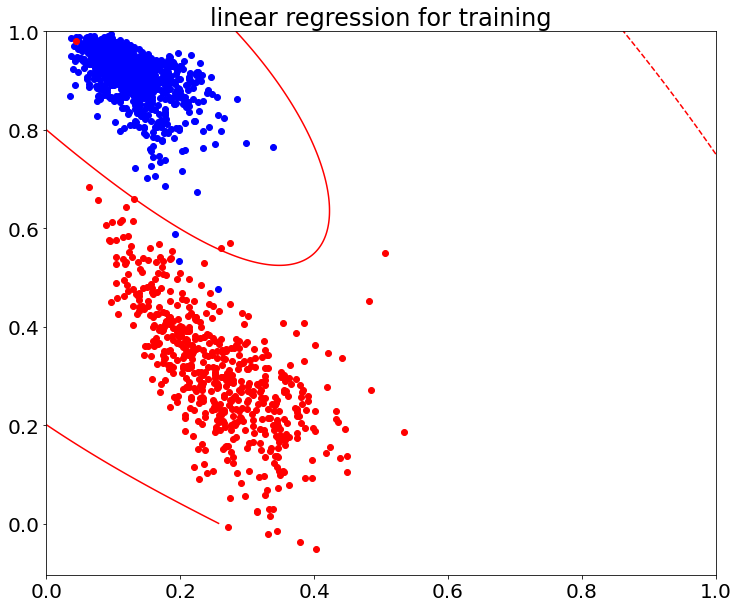

In [152]:
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca();
for i in range(length_training):
    if(list_training[i][0] == 1.0):
        plt.plot(data_training[i,0],data_training[i,1],'bo');
    else:
        plt.plot(data_training[i,0],data_training[i,1],'ro');
        
w_poly_lr = inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(data_training_y)
plt.contour(A, B, f(A, B, w_poly_lr), 1, colors = 'red')

plt.title('linear regression for training')

error = np.mean(np.sign(X_poly.dot(w_poly_lr)) != data_training_y)
print('after transformation linear regression error rate' + str(error))
plt.show()

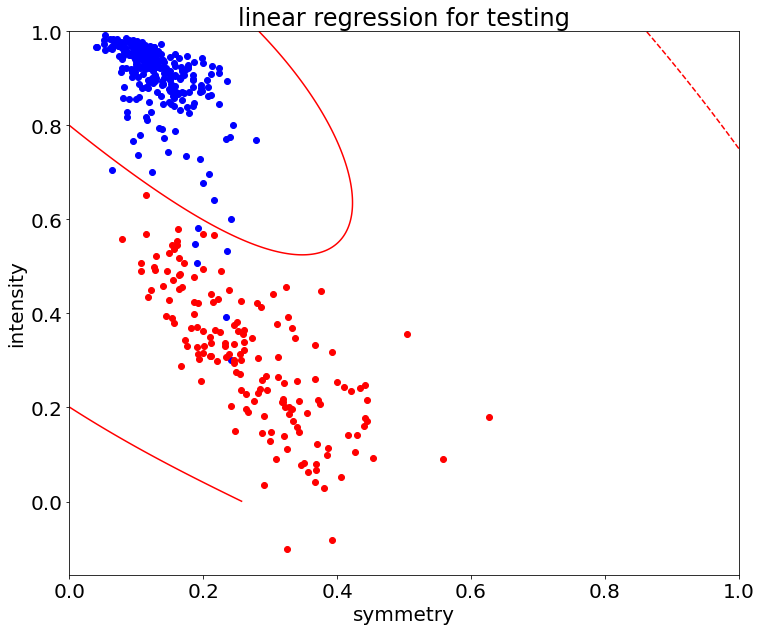

after transformation the error rate is 0.01650943396226415


In [153]:
figure =plt.figure(figsize=(12,10)) #create a new figure
figure_gca = plt.gca();
for i in range(length_test):
    if(list_test[i][0] == 1.0):
        plt.plot(data_test[i,0],data_test[i,1],'bo');
    else:
        plt.plot(data_test[i,0],data_test[i,1],'ro');
w_poly_lr = inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(data_training_y)
plt.contour(A, B, f(A, B, w_poly_lr), 1, colors = 'red')  
plt.title('linear regression for testing')

plt.rcParams.update({'font.size': 20})
plt.ylabel('intensity')
plt.xlabel('symmetry')
plt.show()
print('after transformation the error rate is ' + str(7 / length_test))